Weinberger, S. (2013). Speech accent archive. George Mason University. 
Dataset provided by GMU.

In [1]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook

Download the dataset from Kaggle and extract it to the data folder.
https://www.kaggle.com/datasets/rtatman/speech-accent-archive/data

In [12]:
os.chdir("C:/Users/sagar/Documents/ML/Final Project/ML-AccentMulticlassification/data")
print(os.listdir("C:/Users/sagar/Documents/ML/Final Project/ML-AccentMulticlassification/data"))

['reading-passage.txt', 'recordings', 'speakers_all.csv']


In [13]:
#load the data 
df = pd.read_csv("speakers_all.csv", header=0)

# Check the data
print(df.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df.head())

(2172, 12) is the shape of the dataset
------------------------
    age  age_onset              birthplace  filename native_language   sex  \
0  24.0       12.0         koussi, senegal   balanta         balanta  male   
1  18.0       10.0          buea, cameroon  cameroon        cameroon  male   
2  48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde  male   
3  42.0       42.0   port-au-prince, haiti   haitian         haitian  male   
4  40.0       35.0   port-au-prince, haiti   haitian         haitian  male   

   speakerid   country  file_missing?  Unnamed: 9  Unnamed: 10 Unnamed: 11  
0        788   senegal           True         NaN          NaN         NaN  
1       1953  cameroon           True         NaN          NaN         NaN  
2       1037   nigeria           True         NaN          NaN         NaN  
3       1165     haiti           True         NaN          NaN         NaN  
4       1166     haiti           True         NaN          NaN         NaN  


Columns 9-11 are empty so we clean up the dataframe.

In [14]:
df.drop(df.columns[9:12],axis = 1, inplace = True)
print(df.columns)
df.describe()

Index(['age', 'age_onset', 'birthplace', 'filename', 'native_language', 'sex',
       'speakerid', 'country', 'file_missing?'],
      dtype='object')


,age,age_onset,speakerid
count,2172.000000,2172.000000,2172.000000
mean,33.117173,8.833333,1088.449355
std,14.453039,8.451127,628.420329
min,0.000000,0.000000,1.000000
25%,22.000000,0.000000,543.750000
50%,28.000000,8.000000,1088.500000
75%,41.000000,13.000000,1632.250000
max,97.000000,86.000000,2176.000000


In [15]:
df.groupby("native_language")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
native_language,,,,,,,,
english,579.0,34.482729,16.734510,6.0,21.00,29.0,44.0,90.0
spanish,162.0,34.129630,13.972528,17.0,23.00,30.0,45.0,80.0
arabic,102.0,30.950980,12.047248,18.0,21.25,28.0,38.0,70.0
mandarin,65.0,30.015385,8.193924,18.0,24.00,28.0,34.0,53.0
french,63.0,33.333333,16.246091,18.0,21.00,27.0,39.0,78.0
...,...,...,...,...,...,...,...,...
ife,1.0,30.000000,NaN,30.0,30.00,30.0,30.0,30.0
ilonggo,1.0,53.000000,NaN,53.0,53.00,53.0,53.0,53.0
irish,1.0,28.000000,NaN,28.0,28.00,28.0,28.0,28.0


There are 214 different native language speakers. However, the top 5 native languages don't distinguish speakers well enough.

In [16]:
df.groupby("country")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
usa,393.0,35.652672,18.044364,6.0,21.00,29.0,47.0,90.0
china,88.0,29.477273,9.654940,18.0,23.00,27.0,33.0,72.0
uk,67.0,33.104478,14.900818,18.0,20.00,30.0,38.0,71.0
india,59.0,30.864407,11.501810,18.0,22.00,28.0,35.0,64.0
canada,54.0,31.629630,14.713998,18.0,21.25,26.5,37.5,78.0
...,...,...,...,...,...,...,...,...
chad,1.0,21.000000,NaN,21.0,21.00,21.0,21.0,21.0
burundi,1.0,36.000000,NaN,36.0,36.00,36.0,36.0,36.0
the bahamas,1.0,19.000000,NaN,19.0,19.00,19.0,19.0,19.0


Ordering by countries brings us back to 176 rows. Top 5 countries of speakers is much different from the native languages. Additionally, USA can be further subdivided for accents from different regions in there.

In [17]:
df.groupby("sex")['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
famale,1.0,65.000000,NaN,65.0,65.0,65.0,65.0,65.0
female,1048.0,34.072519,15.337869,0.0,22.0,29.0,43.0,89.0
male,1123.0,32.197240,13.492936,0.0,22.0,28.0,39.0,97.0


About an equal count of male to female speakers.

In [18]:
df.groupby("birthplace")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
birthplace,,,,,,,,
"seoul, south korea",25.0,32.040000,12.300000,18.0,23.0,27.0,40.00,62.0
"skopje, macedonia",21.0,20.047619,1.160870,19.0,19.0,20.0,20.00,24.0
"hong kong, china",19.0,23.473684,4.753577,18.0,19.5,22.0,27.00,33.0
"addis ababa, ethiopia",16.0,28.875000,8.663140,20.0,22.5,27.5,31.00,52.0
"bogota, colombia",14.0,36.785714,20.881271,17.0,21.0,30.5,48.25,80.0
...,...,...,...,...,...,...,...,...
"jalandhar, india",1.0,42.000000,NaN,42.0,42.0,42.0,42.00,42.0
"jalisco, mexico",1.0,45.000000,NaN,45.0,45.0,45.0,45.00,45.0
"jammu, kashmir, india",1.0,25.000000,NaN,25.0,25.0,25.0,25.00,25.0


In [19]:
df.groupby("filename")['age'].describe().sort_values(by=['count'],ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
filename,,,,,,,,
haitian,6.0,36.333333,13.952300,18.0,25.75,41.0,42.75,54.0
swiss,5.0,30.200000,8.318654,21.0,24.00,30.0,34.00,42.0
nicaragua,4.0,37.000000,12.569805,20.0,32.75,39.0,43.25,50.0
jamaican,3.0,36.333333,28.307832,19.0,20.00,21.0,45.00,69.0
liberian,2.0,33.000000,7.071068,28.0,30.50,33.0,35.50,38.0
hawai'i,2.0,71.000000,2.828427,69.0,70.00,71.0,72.00,73.0
afrikaans1,1.0,27.000000,NaN,27.0,27.00,27.0,27.00,27.0
mandarin46,1.0,43.000000,NaN,43.0,43.00,43.0,43.00,43.0
mandarin42,1.0,47.000000,NaN,47.0,47.00,47.0,47.00,47.0


In [20]:
fname = 'recordings/recordings/' + 'mandarin46.mp3'
ipd.Audio(fname)

Seeing the data provided, the best way to classify the accents would be a country based classifier.

Plan to use librosa library to perform MFCC feature extraction on the audio files.

In [21]:
import librosa
import librosa.display

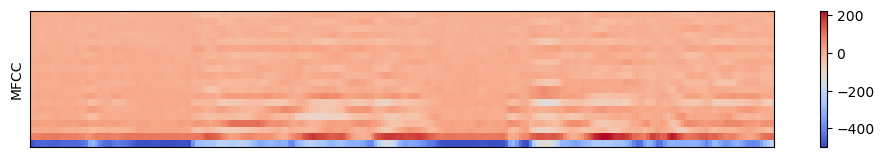

In [32]:
# MFCC for female 
SAMPLE_RATE = 22050
fname_f = 'recordings/recordings/' + 'english385.mp3'  
y, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs... 
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 20) # 5 MFCC components

plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

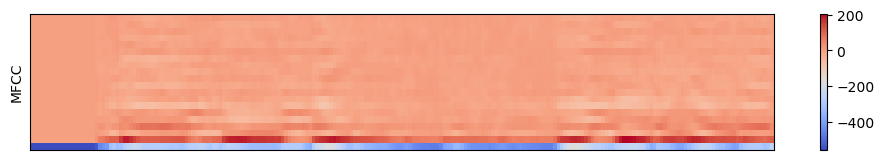

In [33]:
# MFCC for male  
SAMPLE_RATE = 22050
fname_m = 'recordings/recordings/' + 'english381.mp3'  
y, sr = librosa.load(fname_m, sr=SAMPLE_RATE, duration = 5)
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 20)

plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

In [27]:
import torch
import torchaudio
import torchaudio.transforms as transforms

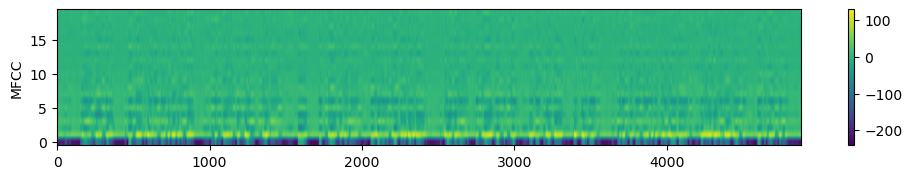

In [34]:
fname_m = 'recordings/recordings/english385.mp3'
waveform, sample_rate = torchaudio.load(fname_m, normalize=True)

# Resample if needed (if your sample rate is not 22050)
resampler = transforms.Resample(orig_freq=sample_rate, new_freq=22050)
waveform = resampler(waveform)

# Compute MFCCs
mfcc_transform = transforms.MFCC(
    sample_rate=22050,
    n_mfcc=20,  # Number of MFCC features
    melkwargs={'n_fft': 400, 'hop_length': 160, 'n_mels': 40}
)
mfcc = mfcc_transform(waveform)

# Display MFCCs
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.imshow(mfcc[0].detach().numpy(), cmap='viridis', origin='lower', aspect='auto')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()

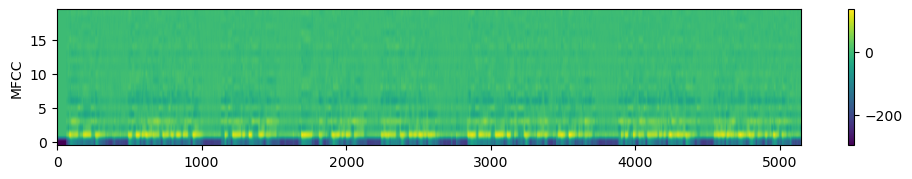

In [35]:
fname_m = 'recordings/recordings/english381.mp3'
waveform, sample_rate = torchaudio.load(fname_m, normalize=True)

# Resample if needed (if your sample rate is not 22050)
resampler = transforms.Resample(orig_freq=sample_rate, new_freq=22050)
waveform = resampler(waveform)

# Compute MFCCs
mfcc_transform = transforms.MFCC(
    sample_rate=22050,
    n_mfcc=20,  # Number of MFCC features
    melkwargs={'n_fft': 400, 'hop_length': 160, 'n_mels': 40}
)
mfcc = mfcc_transform(waveform)

# Display MFCCs
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.imshow(mfcc[0].detach().numpy(), cmap='viridis', origin='lower', aspect='auto')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()

In [36]:
import transformers
import gc
import re

In [37]:
RATE_HZ = 16000 # resampling rate in Hz
MAX_LENGTH = 128000 # maximum audio interval length to consider (= RATE_HZ * SECONDS)
labels = ['usa', 'china', 'uk', 'india', 'canada', 'other']
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

print(id2label, '\n\n', label2id)

{0: 'usa', 1: 'china', 2: 'uk', 3: 'india', 4: 'canada', 5: 'other'} 

 {'usa': 0, 'china': 1, 'uk': 2, 'india': 3, 'canada': 4, 'other': 5}


In [38]:
from pathlib import Path

In [39]:
lang_counter = dict()

def load_data():
    file_list = []
    label_list = []
    for file in Path('recordings/recordings/').glob('*.mp3'):
        lang = re.match(r"(\D+)", file.stem).group(1)
        if lang not in lang_counter.keys():
            lang_counter[lang] = 1
        else:
            lang_counter[lang] += 1
        # if not in our selected langs then 'other'
        if lang not in labels[:-1]:
            lang = labels[-1]
        file_list.append(file)
        label_list.append(label2id[lang])
    dd = pd.DataFrame()
    dd['file'] = file_list
    dd['label'] = label_list
    return dd

In [ ]:
def load_data():
    file_list = []
    label_list = []
    for file in Path('/kaggle/input/speech-accent-archive/recordings/recordings/').glob('*.mp3'):
        lang = re.match(r"(\D+)", file.stem).group(1)
        if lang not in lang_counter.keys():
            lang_counter[lang] = 1
        else:
            lang_counter[lang] += 1
        # if not in our selected langs then 'other'
        if lang not in labels[:-1]:
            lang = labels[-1]
        file_list.append(file)
        label_list.append(label2id[lang])
    dd = pd.DataFrame()
    dd['file'] = file_list
    dd['label'] = label_list
    return dd